In [1]:
import pandas as pd

In [87]:
df1 = pd.read_excel("/content/dataset/Aracaju.xlsx")
df2 = pd.read_excel("/content/dataset/Fortaleza.xlsx")
df3 = pd.read_excel("/content/dataset/Natal.xlsx")
df4 = pd.read_excel("/content/dataset/Recife.xlsx")
df5 = pd.read_excel("/content/dataset/Salvador.xlsx")



In [88]:
df = pd.concat([df1, df2, df3, df4, df5])

In [11]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [12]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [13]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [89]:
# Alterando o tipo de dado da coluna LojaID
df["LojaID"] = df["LojaID"].astype("object")

In [25]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [26]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


Tratando valores faltantes

In [30]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [28]:
# Substituindo os valores nulos pela média
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)

In [34]:
df.sample(15)

,Cidade,Data,Vendas,LojaID,Qtde
126,Recife,2019-03-02,41.87,980,8
97,Natal,2019-01-02,39.91,1037,3
32,Aracaju,2018-01-01,42.97,1522,6
29,Natal,2019-03-09,646.00,854,2
102,Salvador,2019-01-01,40.84,1034,3
228,Natal,2019-01-02,6.87,1037,3
72,Salvador,2019-01-01,149.47,1036,3
118,Natal,2019-01-02,92.21,1035,2
65,Fortaleza,2019-01-01,145.20,1005,2
43,Aracaju,2018-01-01,19.63,1523,9


In [56]:
# Substituindo os valores nulos por zero
df["Vendas"].fillna(0, inplace=True)

In [36]:
df["Vendas"].mean()

122.61180089485438

In [37]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [38]:
# Apagando as linhas com valores nulos
df.dropna(inplace=True)

In [39]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [40]:
# Apagando as linas com valores nulos com base na coluna Vendas
df.dropna(subset=["Vendas"], inplace=True)

In [41]:
# Removendo linhas que estejam com valores faltantes em todas as colunas
df.dropna(how="all", inplace=True)

Criando colunas novas

In [91]:
# Criando colunas de receita
# df["NomeNovaColuna"]
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [44]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [92]:
df["Receita/Vendas"] = df["Receita"] / df["Vendas"]

In [59]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [47]:
df["Receita"].max()

3544.0

In [60]:
df["Receita"].min()

3.34

In [61]:
# Obtaindo as três maiores receitas (Top 3)
df.nlargest(3, ["Receita"])

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [62]:
# Obtaindo as três menores receitas (Lower 3)
df.nsmallest(3, ["Receita"])

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [63]:
df.groupby('Cidade')["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [64]:
# Ordenar o conjunto de dados
df.sort_values(["Receita"], ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


Trabalhando com Datas

In [67]:
df.dtypes

Cidade             object
Data                int64
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
Receita/Vendas    float64
dtype: object

In [93]:
# Transformando a coluna de dadta emtipo inteiro
df["Data"] = df["Data"].astype("int64")

In [66]:
# Verificando a conversão de tipagem(datetime -> int64) da coluna Data
df.dtypes

Cidade             object
Data                int64
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
Receita/Vendas    float64
dtype: object

In [96]:
# Transformando o tipo da coluna Data em data
df['Data'] = pd.to_datetime(df["Data"])

In [97]:
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [71]:
# Agrupando a some da receita da cada ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [133]:
# Criando a coluna Ano
df["Ano_Venda"] = df["Data"].dt.year

In [73]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda
53,Salvador,2019-01-01,39.50,1035,3,118.50,3.0,2019
11,Recife,2019-01-01,202.79,980,5,1013.95,5.0,2019
117,Natal,2019-01-02,39.41,1034,1,39.41,1.0,2019
63,Salvador,2019-01-01,166.59,1036,1,166.59,1.0,2019
112,Aracaju,2018-01-01,4.52,1522,8,36.16,8.0,2018


In [125]:
# Estraindo mês e dia de um ano
df["mes_venda"],df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [78]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda
211,Salvador,2019-01-02,141.05,1035,3,423.15,3.0,2019,1,2
86,Recife,2019-01-01,17.83,982,8,142.64,8.0,2019,1,1
116,Natal,2019-01-02,41.78,1034,3,125.34,3.0,2019,1,2
8,Salvador,2019-02-11,4.96,1036,2,9.92,2.0,2019,2,11
233,Natal,2019-01-03,172.40,1036,2,344.80,2.0,2019,1,3


In [79]:
# Obtenda a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [124]:
# Calculando diferença entre datas
df["diferenca_dias"] = df["Data"] - df["Data"].min()

In [82]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias
106,Aracaju,2018-01-01,16.32,1520,7,114.24,7.0,2018,1,1,0 days
102,Natal,2019-01-02,40.84,1034,3,122.52,3.0,2019,1,2,366 days
110,Aracaju,2018-01-01,38.15,1520,4,152.60,4.0,2018,1,1,0 days
89,Recife,2019-01-01,18.11,980,3,54.33,3.0,2019,1,1,365 days
135,Fortaleza,2019-03-02,10.79,983,5,53.95,5.0,2019,3,2,425 days


In [123]:
# Criando a coluna de trimestre
df['trimestre_venda'] = df['Data'].dt.quarter

In [100]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,trimestre_venda
97,Aracaju,2018-01-01,32.69,1521,5,163.45,5.0,1
14,Salvador,2019-01-12,109.01,1035,2,218.02,2.0,1
96,Salvador,2019-01-01,42.94,1034,3,128.82,3.0,1
16,Natal,2018-07-01,298.00,854,3,894.00,3.0,3
16,Salvador,2019-01-01,32.47,1036,2,64.94,2.0,1


In [103]:
# Filtrando as vendas de 2019 do mês de março
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df['Data'].dt.month == 3)]

In [105]:
vendas_marco_19.sample(20)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,trimestre_venda
112,Recife,2019-03-02,133.59,982,1,133.59,1.0,1
5,Natal,2019-03-30,674.00,854,2,1348.00,2.0,1
115,Salvador,2019-03-02,202.33,1035,2,404.66,2.0,1
114,Recife,2019-03-02,16.82,983,4,67.28,4.0,1
113,Recife,2019-03-02,38.63,980,2,77.26,2.0,1
121,Recife,2019-03-02,41.55,981,3,124.65,3.0,1
126,Recife,2019-03-02,41.87,980,8,334.96,8.0,1
121,Salvador,2019-03-02,100.70,1037,3,302.10,3.0,1
118,Recife,2019-03-02,17.70,981,5,88.50,5.0,1
131,Salvador,2019-03-02,63.48,1037,3,190.44,3.0,1


Visualização de dados

In [106]:
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1002     30
1005     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

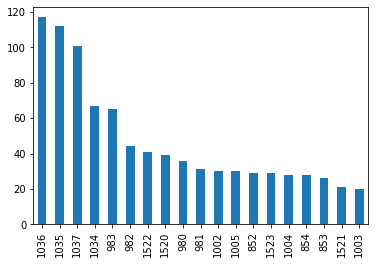

In [107]:
# Integração com matplotlib para visualização de dados - Utilizar .plot após a expressão
df["LojaID"].value_counts(ascending=False).plot.bar()

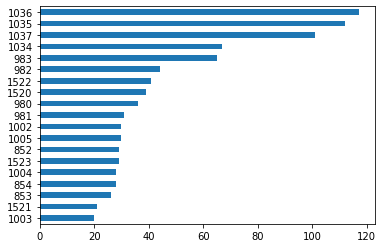

In [110]:
df["LojaID"].value_counts(ascending=True).plot.barh();

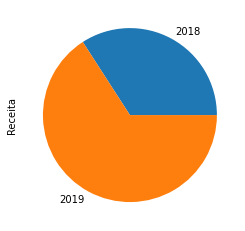

In [113]:
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

In [114]:
# Total de vendas por cidade
df["Cidade"].value_counts()

Salvador     240
Natal        240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

In [115]:
import matplotlib.pyplot as plt

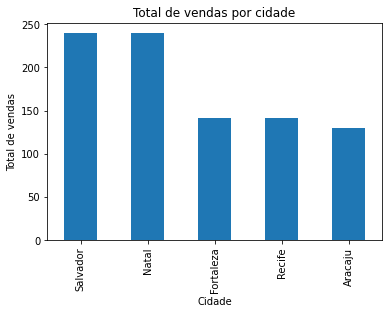

In [119]:
df["Cidade"].value_counts().plot.bar(title="Total de vendas por cidade");
plt.xlabel('Cidade');
plt.ylabel('Total de vendas');

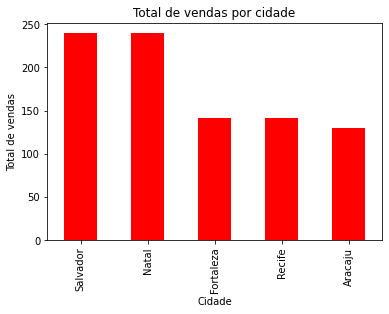

In [120]:
df["Cidade"].value_counts().plot.bar(title="Total de vendas por cidade", color="red");
plt.xlabel('Cidade');
plt.ylabel('Total de vendas');

In [121]:
# Alterando o estilo
plt.style.use('ggplot')

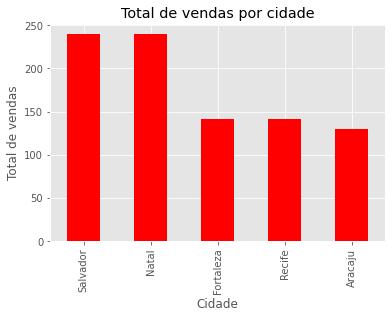

In [122]:
df["Cidade"].value_counts().plot.bar(title="Total de vendas por cidade", color="red");
plt.xlabel('Cidade');
plt.ylabel('Total de vendas');

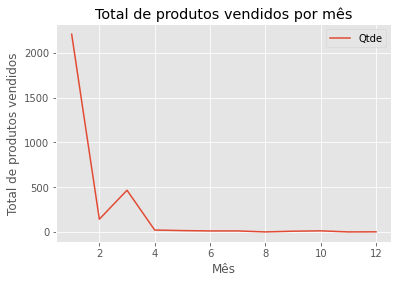

In [131]:
df.groupby(df['mes_venda'])['Qtde'].sum().plot(title="Total de produtos vendidos por mês")
plt.xlabel('Mês');
plt.ylabel('Total de produtos vendidos');
plt.legend();

In [132]:
df.groupby(df['mes_venda'])['Qtde'].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [134]:
df_2019 = df[df['Ano_Venda'] == 2019]

In [135]:
df_2019.sample(20)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,trimestre_venda,diferenca_dias,mes_venda,dia_venda,Ano_Venda
126,Fortaleza,2019-03-02,41.87,980,8,334.96,8.0,1,425 days,3,2,2019
132,Recife,2019-03-02,17.49,983,5,87.45,5.0,1,425 days,3,2,2019
89,Salvador,2019-01-01,17.46,1034,1,17.46,1.0,1,365 days,1,1,2019
119,Recife,2019-03-02,152.30,982,7,1066.10,7.0,1,425 days,3,2,2019
82,Recife,2019-01-01,29.55,981,6,177.30,6.0,1,365 days,1,1,2019
98,Salvador,2019-01-01,231.76,1036,3,695.28,3.0,1,365 days,1,1,2019
158,Salvador,2019-01-02,183.64,1037,3,550.92,3.0,1,366 days,1,2,2019
78,Salvador,2019-01-01,111.20,1036,3,333.60,3.0,1,365 days,1,1,2019
32,Fortaleza,2019-01-01,43.33,1004,4,173.32,4.0,1,365 days,1,1,2019
136,Natal,2019-01-02,13.81,1036,1,13.81,1.0,1,366 days,1,2,2019


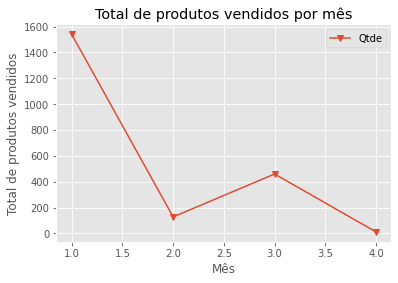

In [139]:
df_2019.groupby(df_2019['mes_venda'])['Qtde'].sum().plot(title="Total de produtos vendidos por mês",marker="v")
plt.xlabel('Mês');
plt.ylabel('Total de produtos vendidos');
plt.legend();

(array([191., 193., 221.,  85.,  54.,  61.,  38.,  31.,  14.,   6.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

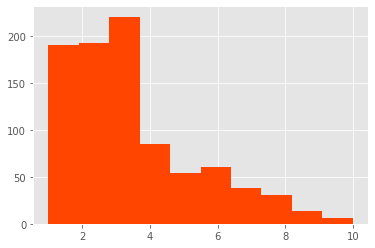

In [141]:
# Histograma
plt.hist(df['Qtde'], color="orangered")

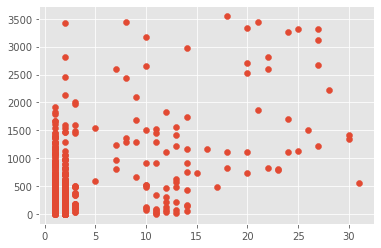

In [143]:
# Define o que será mostrado no exito x e no eixo y
# Gráfico de dispersão
plt.scatter(x=df['dia_venda'], y=df['Receita']);

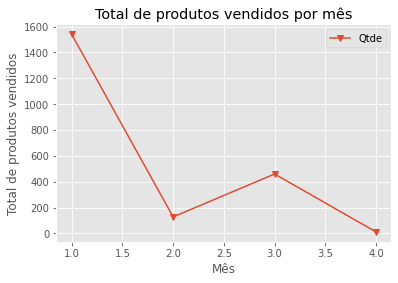

In [144]:
df_2019.groupby(df_2019['mes_venda'])['Qtde'].sum().plot(title="Total de produtos vendidos por mês",marker="v")
plt.xlabel('Mês');
plt.ylabel('Total de produtos vendidos');
plt.legend();
plt.savefig("grafico QTDE e MES.png");  # Salvar o gráfico